## Import Required Libraries

In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore') 

## Connect to MySQL

In [2]:
# Connect to MySQL
connect = mysql.connector.connect(
    host="localhost",
    user="root",       
    password="Vergin@2004",   
    database="Sales_database" )

## SQL query 

### 1.Total Revenue and Quantity by Product

In [3]:
# Total Revenue and Quantity by Product

query1 = """
SELECT 
    product,
    SUM(quantity) AS total_quantity,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product;
"""

In [4]:
# Load results into pandas
df1 = pd.read_sql(query1, connect)
df1

,product,total_quantity,revenue
0,Smartphone,2.0,599.979980
1,Laptop,1.0,899.989990
2,Smartwatch,3.0,599.970016
3,Tablet,2.0,799.979980
4,Headphones,5.0,249.950008
5,Bluetooth Speaker,3.0,239.969994
6,Keyboard,4.0,119.959999
7,Mouse,6.0,119.939999
8,Gaming Console,1.0,499.989990
9,Monitor,2.0,299.980011


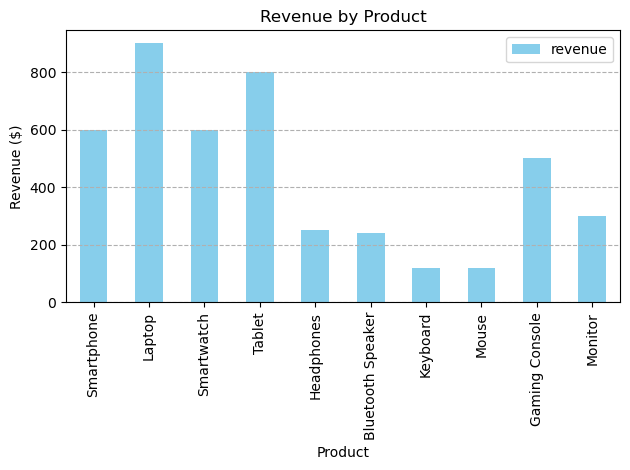

In [5]:
# Plot revenue by product

df1.plot(kind='bar', x='product', y='revenue', color='skyblue')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue ($)")
plt.tight_layout()
plt.grid(axis='y', linestyle='--')
plt.savefig("sales_summary_chart.png")
plt.show()

### 2.Top-Selling Product by Revenue

In [6]:
# Top-Selling Product by Revenue
query2 = """
SELECT 
    product,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
ORDER BY revenue DESC
LIMIT 1;
"""

In [7]:
# Load results into pandas
df2 = pd.read_sql(query2, connect)
df2

,product,revenue
0,Laptop,899.98999


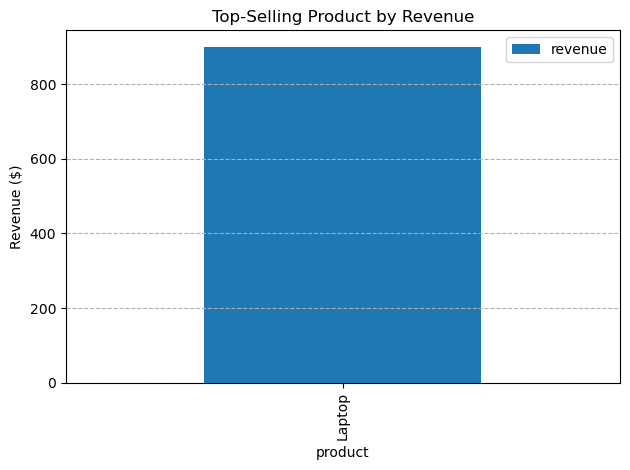

In [8]:
# Plot Top-Selling Product by Revenue

df2.plot(kind='bar', x='product', y='revenue', title='Top-Selling Product by Revenue')
plt.ylabel('Revenue ($)')
plt.tight_layout()
plt.grid(axis='y', linestyle='--')
plt.show()

### 3.Top-Selling Product by Quantity

In [9]:
# Top-Selling Product by Quantity

query3 = """
SELECT 
    product,
    SUM(quantity) AS total_quantity
FROM sales
GROUP BY product
ORDER BY total_quantity DESC
LIMIT 1;
"""

In [10]:
# Load results into pandas
df3 = pd.read_sql(query3, connect)
df3

,product,total_quantity
0,Mouse,6.0


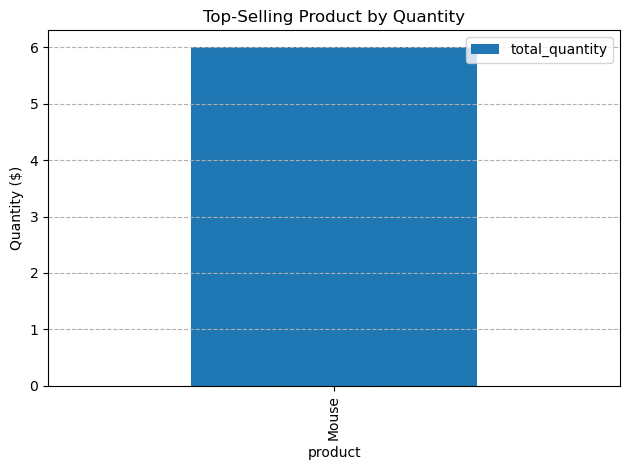

In [11]:
# Plot Top-Selling Product by Quantity

df3.plot(kind='bar', x='product', y='total_quantity', title='Top-Selling Product by Quantity')
plt.ylabel('Quantity ($)')
plt.tight_layout()
plt.grid(axis='y', linestyle='--')
plt.show()

### 4.Daily Revenue Trend

In [12]:
# Daily Revenue Trend
query4 = """
SELECT 
    sale_date,
    SUM(quantity * price) AS daily_revenue
FROM sales
GROUP BY sale_date
ORDER BY sale_date;
"""

In [13]:
# Load results into pandas
df4 = pd.read_sql(query4, connect)
df4

,sale_date,daily_revenue
0,2025-04-01,1499.969971
1,2025-04-02,1399.949997
2,2025-04-03,489.920002
3,2025-04-04,239.899998
4,2025-04-05,799.970001


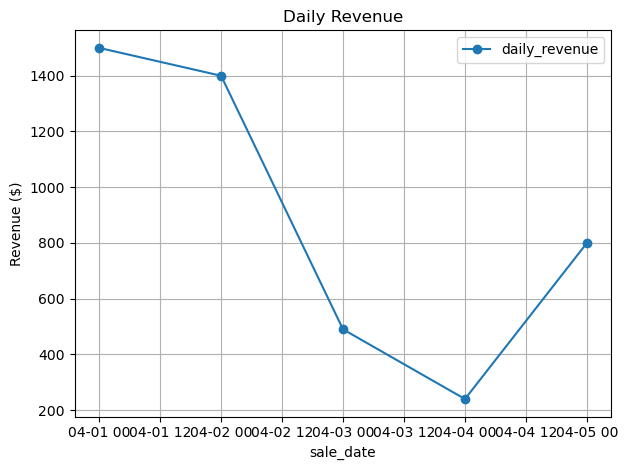

In [14]:
# Plot Daily Revenue Trend

df4.plot(kind='line', x='sale_date', y='daily_revenue', marker='o', title='Daily Revenue')
plt.ylabel('Revenue ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

### 5.Monthly Revenue

In [15]:
# Monthly Revenue
query5 = """
SELECT 
    DATE_FORMAT(sale_date, '%Y-%m') AS month,
    SUM(quantity * price) AS monthly_revenue
FROM sales
GROUP BY month
ORDER BY month;
"""

In [16]:
# Load results into pandas
df5 = pd.read_sql(query5, connect)
df5

,month,monthly_revenue
0,2025-04,4429.709969


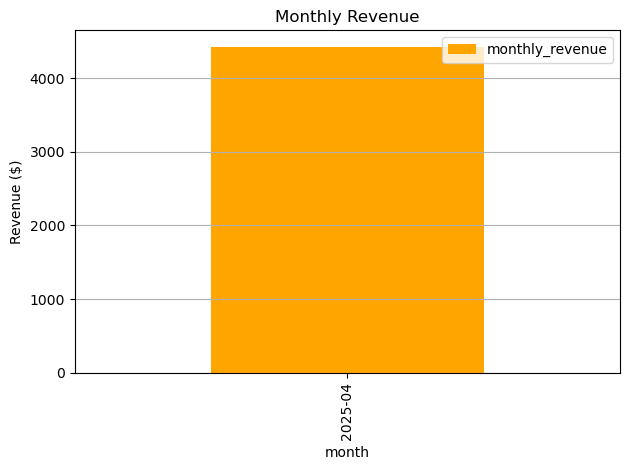

In [17]:
# Plot Monthly Revenue

df5.plot(kind='bar', x='month', y='monthly_revenue', color='orange', title='Monthly Revenue')
plt.ylabel('Revenue ($)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### 6.Detailed Transaction List

In [18]:
# Detailed Transaction List
query6 = """
SELECT 
    id,
    product,
    quantity,
    price,
    quantity * price AS total_price,
    sale_date
FROM sales
ORDER BY sale_date;
"""

In [19]:
# Load results into pandas
df6 = pd.read_sql(query6, connect)
df6

,id,product,quantity,price,total_price,sale_date
0,1,Smartphone,2,299.99,599.979980,2025-04-01
1,2,Laptop,1,899.99,899.989990,2025-04-01
2,3,Smartwatch,3,199.99,599.970016,2025-04-02
3,4,Tablet,2,399.99,799.979980,2025-04-02
4,5,Headphones,5,49.99,249.950008,2025-04-03
5,6,Bluetooth Speaker,3,79.99,239.969994,2025-04-03
6,7,Keyboard,4,29.99,119.959999,2025-04-04
7,8,Mouse,6,19.99,119.939999,2025-04-04
8,9,Gaming Console,1,499.99,499.989990,2025-04-05
9,10,Monitor,2,149.99,299.980011,2025-04-05


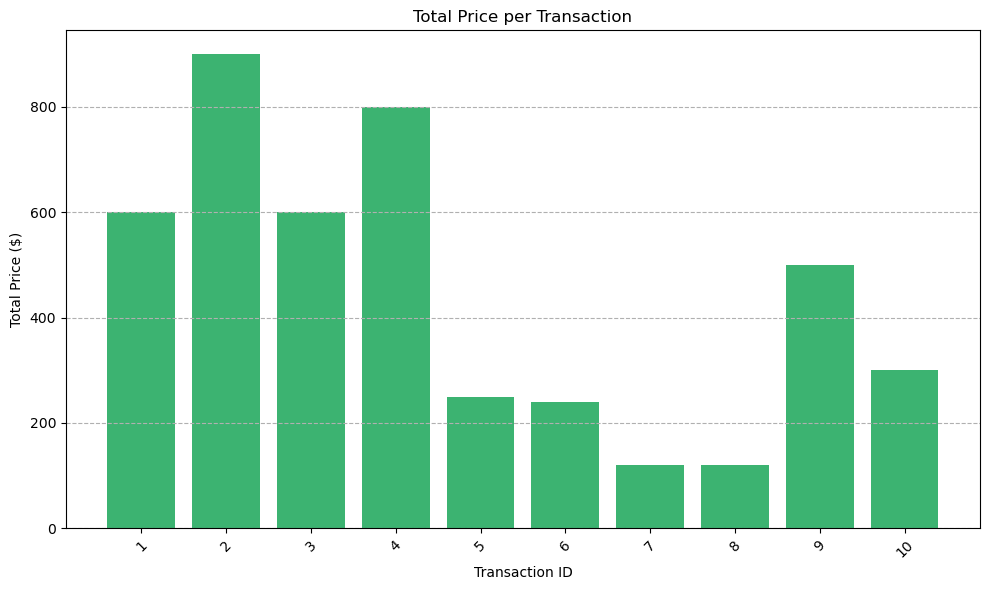

In [20]:
# Plot total_price for each transaction by sale_date
plt.figure(figsize=(10, 6))
plt.bar(df6['id'].astype(str), df6['total_price'], color='mediumseagreen')
plt.xlabel('Transaction ID')
plt.ylabel('Total Price ($)')
plt.title('Total Price per Transaction')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


### 7.Total Revenue of All Sales

In [21]:
# Total Revenue of All Sales
query7 = "SELECT SUM(quantity * price) AS total_revenue FROM sales;"

In [22]:
# Load results into pandas
df7 = pd.read_sql(query7, connect)
df7

,total_revenue
0,4429.709969


### Average Price per Product

In [23]:
# Average Price per Product
query8 = """
SELECT 
    product,
    AVG(price) AS avg_price
FROM sales
GROUP BY product;
"""

In [24]:
# Load results into pandas
df8 = pd.read_sql(query8, connect)
df8

,product,avg_price
0,Smartphone,299.989990
1,Laptop,899.989990
2,Smartwatch,199.990005
3,Tablet,399.989990
4,Headphones,49.990002
5,Bluetooth Speaker,79.989998
6,Keyboard,29.990000
7,Mouse,19.990000
8,Gaming Console,499.989990
9,Monitor,149.990005


In [25]:
# Sort by quantity descending
df8_sorted = df8.sort_values(by='avg_price')

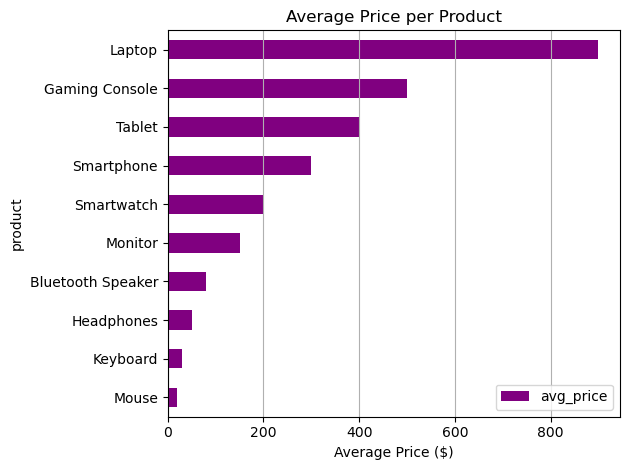

In [26]:
df8_sorted.plot(kind='barh', x='product', y='avg_price', color='purple', title='Average Price per Product')
plt.xlabel('Average Price ($)')
plt.tight_layout()
plt.grid(axis='x')
plt.show()